REGISTER NUMBER : 20MI0015

GitHub - 

WEB MINING - Scarping contents of a webpage

Start date : 01 May 2021 
End date   : 12 May 2021


Pre requesites 

1.   Before Beginning the task it is important to check whether the website that we are scraping is legaly allowing us to do so.
2.   So, by making use /robots.txt at the end of the web page will provide us the legal notice to access and fair use of the contents of the website.

 


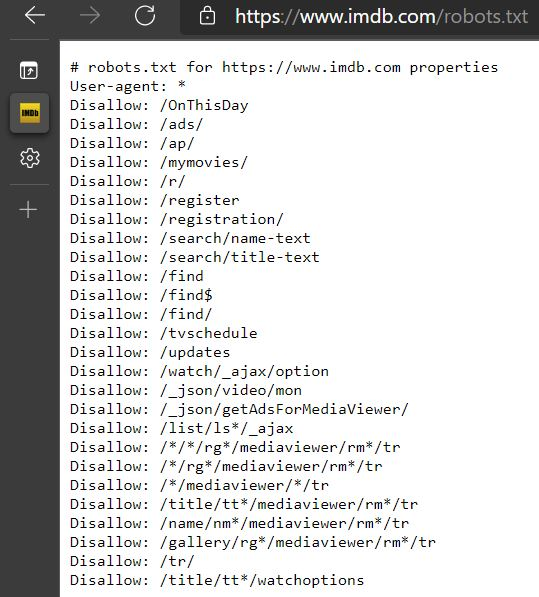

In [1]:
import numpy as np
import pandas as pd

In [2]:
import lxml
import re
import requests
from requests import get
from bs4 import BeautifulSoup

In [396]:
class IMDB(object):
  #init
	def __init__(self, url):
		super(IMDB, self).__init__()
		page = get(url)
		self.soup = BeautifulSoup(page.content, 'lxml')
  #for h1
	def articleTitle(self):
		return self.soup.find("h1", class_="header").text.replace("\n","")
  #for div
	def bodyContent(self):
		content = self.soup.find(id="main")
		return content.find_all("div", class_="lister-item mode-advanced")
  #for all the sub feilds
	def movieData(self):
		movieFrame = self.bodyContent()
		movieTitle = []
		movieDate = []
		movieRunTime = []
		movieGenre = []
		movieRating = []
		movieScore = []
		movieDescription = []
		movieDirector = []
		movieStars = []
		movieVotes = []
		movieGross = []
		for movie in movieFrame:
			movieFirstLine = movie.find("h3", class_="lister-item-header")
			movieTitle.append(movieFirstLine.find("a").text)
			movieDate.append(re.sub(r"[()]","", movieFirstLine.find_all("span")[-1].text))
			try:
				movieRunTime.append(movie.find("span", class_="runtime").text[:-4])
			except:
				movieRunTime.append(np.nan)
			movieGenre.append(movie.find("span", class_="genre").text.rstrip().replace("\n","").split(","))
			try:
				movieRating.append(movie.find("strong").text)
			except:
				movieRating.append(np.nan)
			try:
				movieScore.append(movie.find("span", class_="metascore unfavorable").text.rstrip())
			except:
				movieScore.append(np.nan)
			movieDescription.append(movie.find_all("p", class_="text-muted")[-1].text.lstrip())
			movieCast = movie.find("p", class_="")

			try:
				casts = movieCast.text.replace("\n","").split('|')
				casts = [x.strip() for x in casts]
				casts = [casts[i].replace(j, "") for i,j in enumerate(["Director:", "Stars:"])]
				movieDirector.append(casts[0])
				movieStars.append([x.strip() for x in casts[1].split(",")])
			except:
				casts = movieCast.text.replace("\n","").strip()
				movieDirector.append(np.nan)
				movieStars.append([x.strip() for x in casts.split(",")])

			movieNumbers = movie.find_all("span", attrs={"name": "nv"})

			if len(movieNumbers) == 2:
				movieVotes.append(movieNumbers[0].text)
				movieGross.append(movieNumbers[1].text)
			elif len(movieNumbers) == 1:
				movieVotes.append(movieNumbers[0].text)
				movieGross.append(np.nan)
			else:
				movieVotes.append(np.nan)
				movieGross.append(np.nan)

		movieData = [movieTitle, movieDate, movieRunTime, movieGenre, movieRating, movieScore, movieDescription,
							movieDirector, movieStars, movieVotes, movieGross]
		return movieData

checking for the response. If it is 200 then the response is success response else for other numbers, it is treated as a failure response

In [397]:
http_response = requests.get("https://www.imdb.com/search/title?count=100&title_type=feature,tv_series&ref_=nv_wl_img_2")
http_response

<Response [200]>

In [409]:
site1 = IMDB("https://www.imdb.com/search/title?count=100&title_type=feature,tv_series&ref_=nv_wl_img_2")
print("Subject: ", site1.articleTitle())
data = site1.movieData()
Fields = ["Title", "Date", "RunTime", "Genre", "Rating", "Score", "Description",
							"Director", "Stars", "Votes", "Gross"]
for j in range (len(data[1])):
  n=1+j
  print("------------Movie Number "+str(n)+"------------")
  for i in range (len(data)):
    print(Fields[i] +" : " + str(data[i][j]))
  print("")

Subject:  Feature Film/TV Series(Sorted by Popularity Ascending) 
------------Movie Number 1------------
Title : Shadow and Bone
Date : 2021– 
RunTime : nan
Genre : ['Action', ' Adventure', ' Drama']
Rating : 7.9
Score : nan
Description : Dark forces conspire against orphan mapmaker Alina Starkov when she unleashes an extraordinary power that could change the fate of her war-torn world.
Director : TV-14
Stars : ['Action', 'Adventure', 'Drama']
Votes : 37,027
Gross : nan

------------Movie Number 2------------
Title : The Mitchells vs the Machines
Date : 2021
RunTime : 113
Genre : ['Animation', ' Adventure', ' Comedy']
Rating : 7.9
Score : nan
Description : A quirky, dysfunctional family's road trip is upended when they find themselves in the middle of the robot apocalypse and suddenly become humanity's unlikeliest last hope.
Director : PG
Stars : ['113 min']
Votes : 30,564
Gross : nan

------------Movie Number 3------------
Title : Invincible
Date : 2021– 
RunTime : nan
Genre : ['Anima